# Deep neural nets for object recognition
In this exercise, you will first develop a fully connected neural net model and test it on the CIFAR-10 problem. Then, you will build a convolutional neural net model and test it on the same CIFAR-10 problem. The purpose of this exercise is to give you a working understanding of neural net models and give you experience in tuning their (many) hyper-parameters.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import copy

# The CIFAR10 dataset
- Download and normalize the CIFAR10 dataset from torchvision
- Split the CIFAR10 data into train, validation and test set
- Set the batch size for processing these datasets
- Build the dataloaders for train, validation, and test set which will be used in the training loop
- Define the string class labels (targets are numeric 0-9)

In [2]:
# mean and std for the RGB channels in CIFAR10
tmean = [0.49139968, 0.48215841, 0.44653091]
tstd = [0.24703223, 0.24348513, 0.26158784]

# transform the 32x32x3 images into a tensor after normalizing
# each channel using the parameters above
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(tmean, tstd)])

# download and transform the  trainset and testset for training
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)

#split trainset into a train and a val set (90-10 split)
lengths = [int(p * len(trainset)) for p in [0.9,0.1]]
tr,v = torch.utils.data.random_split(trainset,lengths)
train_sampler = torch.utils.data.SubsetRandomSampler(tr.indices)
val_sampler = torch.utils.data.SubsetRandomSampler(v.indices)

# set batch size and set up the data generators for train, val, test sets
batch_size = 64
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,sampler=train_sampler)
valloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,sampler=val_sampler)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

print("Number of training batches = ",len(trainloader))
print("Number of validation batches = ",len(valloader))
print("Number of test batches = ",len(testloader))

# define the output classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
Number of training batches =  704
Number of validation batches =  79
Number of test batches =  157


# Visualize the training data

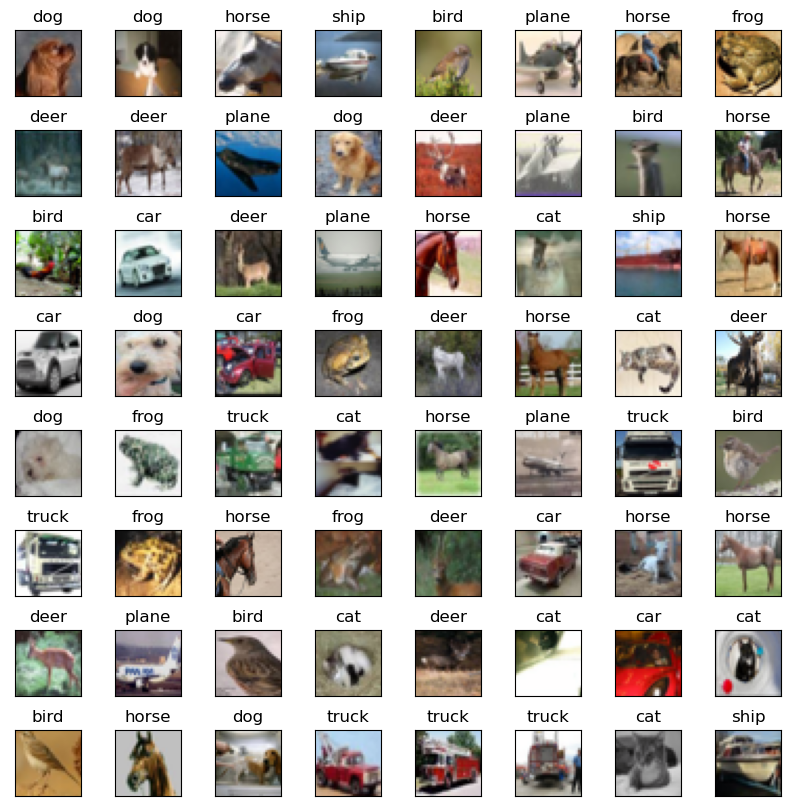

In [3]:
Xtr,ytr = next(iter(trainloader))
# make a 8x8 grid and display 64 images from the first batch of training data
rows,cols = 8,8
fig = plt.figure(figsize=(8,8),constrained_layout=True)

for i in range(0,rows*cols):
    fig.add_subplot(rows,cols,i+1)
    tmp = np.transpose(Xtr[i].numpy(),(1,2,0))
    plt.imshow(((tmp*tstd + tmean)*255).astype(np.uint8))
    plt.xticks([])
    plt.yticks([])
    plt.title(classes[ytr[i].numpy()])

# A five layer fully connected (FC) feedforward network
- has an input layer, two hidden layers, and an output layer
- complete the function definitions below
- you will find d2l.ai Chapters 5.2, 5.6, 6.1, 6.2, 6.3 very useful 

In [4]:
class FiveLayerFC(nn.Module):
    
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes,lr,wd):
        super().__init__()
        # set up learning rate lr and weight decay wd
        # set up the network structure using nn.Sequential
        # use the ReLU non-linearity after all the hidden layers 
        # use Xavier normal initialization for the weights in the hidden layers
        # use zero initialization for the bias weights
        # do not forget to Flatten the input before passing it to the first hidden layer
        # YOUR CODE HERE
        pass
        
        
        # CODE END

    def forward(self, x):
        # forward propagate the input x through the network
        # output should be a vector of dimension 10
        # YOUR CODE HERE
        pass
        
        # CODE END

    def loss(self,yhat,y,averaged=True):
        # use nn.functional.cross_entropy() to evaluate loss with prediction (yhat)
        # and truth (y). Average it over a batch.
        # YOUR CODE HERE
        pass
        
        # CODE END

    def predict(self,x):
       # propagate x forward and return the index of the
       # the highest valued output component
       # YOUR CODE HERE
        pass
        
       # CODE END

    def configure_optimizers(self):
        # set up the Adam optimizer with learning rate and weight decay specified 
        # in the model object
        # YOUR CODE HERE
        pass
        
        # CODE END


# Test the FiveLayerFC class
- set the device to GPU if you have access to it. 
- In Google Colab, you can select runtime, and pick the free T4 GPU choice.
- to understand how GPU memory and CPU memory interact, read Section 6.7 of the d2l.ai textbook.

In [ ]:
lr = 1e-2
wd = 1e-2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Device is: ', device)

def test_FiveLayerFC(lr,wd):
    input_size = 32*32*3
    x = torch.zeros((64, input_size), dtype=torch.float).to(device)  # minibatch size 64, feature dimension 50
    model = FiveLayerFC(input_size, 100, 100,10,lr,wd).to(device)
    outputs = model(x)
    print(outputs.size())  # you should see [64, 10]

test_FiveLayerFC(lr,wd)

# Checking the network setup
As a sanity check, make sure you can overfit a small dataset of 64 images. We will use a five-layer network with 100 units in the two hidden layers. You will need to tweak the learning rate and weight decay, but you should be able to overfit and achieve 100% training accuracy within 20 epochs. We have given you parameter choices that work. You should report on at least another choice of learning rate and weight decay that allows you to fit the training data to 100% accuracy within 20 epochs.

Complete the function train_model_small that takes a single batch (Xtr,ytr) of 64 images and their labels for training, and a single batch (Xval,yval) of validation images and trains an initialized model for num_epochs epochs.

- Initialize train_loss and val_loss (which will hold training and validation set loss for each epoch)
- Configure optimizer for the model
- for epoch in range(num_epochs)
    - zero out gradients in the optimizer
    - compute output of network by forward propagating Xtr through network
    - compute loss using output and ytr
    - backpropagate the loss
    - store the training loss for this epoch
    - compute validation set loss for this epoch (remember to turn off gradient update with torch.no_grad())
- return model, train_loss and val_loss


In [ ]:
Xtr,ytr = next(iter(trainloader))
Xval, yval = next(iter(valloader))
num_epochs = 20

lr = 1e-2
wd = 1e-3

def train_model_small(model,Xtr,ytr,Xval,yval,num_epochs):

    # YOUR CODE HERE
    pass

    # END YOUR CODE

model = FiveLayerFC(32*32*3,100,100,10,lr,wd)
model,train_loss,val_loss = train_model_small(model,Xtr,ytr,Xval,yval,num_epochs)
plt.plot(torch.arange(num_epochs),train_loss)

# Test your model on the training set
- you should get 100% accuracy

In [ ]:
with torch.no_grad():
    ypred = model.predict(Xtr)

    cm = sklearn.metrics.confusion_matrix(ytr,ypred)
    acc = sklearn.metrics.accuracy_score(ytr,ypred)
    print('Accuracy on test set = ',acc)
    print(cm)
    print(sklearn.metrics.classification_report(ytr,ypred))

# Train the full model
- Initialize train_loss and val_loss (which will hold training and validation set loss for each epoch)
- Configure optimizer for the model
- for epoch in range(num_epochs)
    - for each batch (Xtr,ytr) in training set
       - zero out gradients in the optimizer
       - compute output of network by forward propagating Xtr through network
       - compute loss using output and ytr
       - backpropagate the loss
       - accumulate the training loss for this batch
    - store training loss for this epoch
    - compute validation set loss for this epoch (remember to turn off gradient update with torch.no_grad()) and remember to iterate over all the batches of the validation set
    
- return model, train_loss and val_loss


In [ ]:
def train_model(model,trainloader,valloader,num_epochs):
    # YOUR CODE HERE
    pass
    
    # END YOUR CODE

# Train and test performance of model
- hyperparameter choice: lr = 1e-5, weight_decay = 1e-2
- train the model using training and validation data
- get accuracy, confusion matrix and classification report on test data


In [ ]:
lr = 1e-5
wd = 1e-2
num_epochs = 20

model = FiveLayerFC(32*32*3,200,200,10,lr,wd).to(device)
model,train_loss,val_loss = train_model(model,trainloader,valloader,num_epochs)

In [ ]:
plt.plot(torch.arange(num_epochs),train_loss, label="train_loss")
plt.plot(torch.arange(num_epochs),val_loss, label="val_loss")
plt.legend()

In [ ]:
def model_eval(model,testloader):
    with torch.no_grad():
        ys=[]
        outputs=[]
        for i, tdata in enumerate(testloader):
            tX,ty = tdata
            tX=tX.to(device)
            ty=ty.to(device)
            output = model.predict(tX)
            ys.append(ty.detach().cpu().numpy())
            outputs.append(output.detach().cpu().numpy())
       
        
    ys=np.hstack(ys)
    outputs= np.hstack(outputs)
    cm = sklearn.metrics.confusion_matrix(ys,outputs)
    print("****************************************************************************************")
    print("confusion matrix:")
    print(cm)

    print("****************************************************************************************")
    print("performance matrix:")
    print(sklearn.metrics.classification_report(ys,outputs))

In [ ]:
model_eval(model,testloader)

# Train and test performance of model
- hyperparameter choice: lr = 5e-6, weight_decay = 5e-2, num_epochs  = 30
- build the model by calling the train_model function
- plot the training and validation loss curves
- get accuracy, confusion matrix and classification report on test data



In [ ]:
# your code to accomplish the steps above


# Convolutional network
- complete the class definition below
- The network structure is provided. Feel free to modify it -- in which case, rename the class, and run the experiments below.
- The network structure is a sequence of three Conv2d, ReLU, Conv2D, ReLU, MaxPool2d, BatchNorm2d blocks.
- The final layers include two fully connected layers and an output layer with 10 units.


In [ ]:
class ConvModel(nn.Module):
    def __init__(self,lr,wd):
        super().__init__()
        self.lr = lr
        self.wd = wd
        self.net = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16
            nn.BatchNorm2d(64),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8
            nn.BatchNorm2d(128),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4
            nn.BatchNorm2d(256),

            nn.Flatten(),
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))

    def forward(self,x):
        # forward propagate x through network
        # YOUR CODE HERE
        
        pass

    def loss(self,yhat,y,averaged=True):
        # compute cross-entropy loss between network output and true labels y
        # averaged over a batch
        # YOUR CODE HERE
        pass

    def predict(self,X):
        # return the index of the highest output in the output layer
        # YOUR CODE HERE
        pass

    def configure_optimizers(self):
        # set up the Adam optimizer with default parameters and 
        # model's learning rate and weight decay
        # YOUR CODE HERE
        pass

# Train the model
- under two sets of hyperparameters

In [ ]:
lr = 1e-4
wd = 1e-1
num_epochs = 30


model = ConvModel(lr,wd).to(device)
model,train_loss,val_loss = train_model(model,trainloader,valloader,num_epochs)

In [ ]:
# plot the validation and training loss curves
# your code here



In [ ]:
# run the trained model on test data and report
# accuracy, confusion matrix and classification report
# your code here



In [ ]:
# hyperparameter set 2

lr = 1e-3
wd = 1e-3
num_epochs = 20


model = ConvModel(lr,wd).to(device)
model,train_loss,val_loss = train_model(model,trainloader,valloader,num_epochs)

In [ ]:
# plot the validation and training loss curves
# your code here



In [ ]:
# run the trained model on test data and report
# accuracy, confusion matrix and classification report
# your code here


# Comment on 
- performance difference between multilayer feedforward and convolutional neural nets
- difference in the number of parameters between the two classes of deep models
- impact of learning rate and weight decay choice on the feedforward networks
- impact of learning rate and weight decay choice on convolutional networks
- experiment with these two hyperparameters to achieve > 50% accuracy with feedforward networks, and > 80% accuracy with convolutional networks


YOUR COMMENTS HERE